In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from emoji import UNICODE_EMOJI
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [91]:
!pip install cleantext

In [18]:
#df=pd.read_csv("C:\\Users\\Dell\\Desktop\\Desktop\\persona5_comments.csv", on_bad_lines='skip')
df=pd.read_csv("C:\\Users\\Dell\\Desktop\\Desktop\\persona5_comments.csv", encoding='utf-8', on_bad_lines='skip')
df

,Unnamed: 0,comment,comment_id,author_url,author_name,reply_count,like_count,date,vidid,total_reply_counts,vid_title,just_date
0,0,i miss persona so much,Ugx0zwIS6uriyCQCQv14AaABAg,http://www.youtube.com/channel/UCs9iTvqDxkfEUu...,@mochii_,0,0,2024-01-19 14:53:36+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-19
1,1,Mid,UgyvEkCTMAqU1iDsdtV4AaABAg,http://www.youtube.com/channel/UCyid1F0mBLmxYi...,@leonader9465,0,0,2024-01-19 00:41:36+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-19
2,2,🚬,Ugx6LWyI26fIMtnQWKl4AaABAg,http://www.youtube.com/channel/UCy8nFQykrxg-xV...,@eleduardo3581,0,0,2024-01-10 07:17:45+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-10
3,3,When persona 5 i love it favorite of multivers...,UgzFUFGouCUHzkDL2JR4AaABAg,http://www.youtube.com/channel/UCEN1_j5_PhsTLF...,@ultimateallstarclan6855,0,0,2024-01-05 06:47:58+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-05
4,4,スマブラspなら、リンク、ジョーカー、クラウド使ってたわw,Ugzaca0s0TbdHhYEJEx4AaABAg,http://www.youtube.com/channel/UCJ7RsXle8t7F-X...,@user-wc7sr5bh2e,0,1,2024-01-02 23:09:39+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...
2409,2409,My body is ready for this game \nEXCEPT \nFor ...,Ugz5cLGRTPOMbJYcWtx4AaABAg,http://www.youtube.com/channel/UCX-FrKgUucaD5Z...,@nuzz_3936,47,2498,2019-09-10 21:29:25+00:00,vWWy7V9rCrA,47,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10
2410,2410,Looking cool joker,UgyNcSHj6bfIuliSLBB4AaABAg,http://www.youtube.com/channel/UCtUQFhdRY40c1K...,@telly3436,3,403,2019-09-10 21:28:22+00:00,vWWy7V9rCrA,3,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10
2411,2411,This is not Persona 6,UgwghYNfRYUF5sM1yoB4AaABAg,http://www.youtube.com/channel/UCyKBRHoApfgE17...,@denzil2315,11,198,2019-09-10 21:26:29+00:00,vWWy7V9rCrA,11,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10
2412,2412,Cool looking,Ugw2mUZ1ptviLyppeIJ4AaABAg,http://www.youtube.com/channel/UCIti7RLDHPnaCu...,@hacktorb106,0,3,2019-09-10 21:26:21+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10


In [19]:
del df['author_url']
del df['comment_id']
del df['reply_count']
df

,Unnamed: 0,comment,author_name,like_count,date,vidid,total_reply_counts,vid_title,just_date
0,0,i miss persona so much,@mochii_,0,2024-01-19 14:53:36+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-19
1,1,Mid,@leonader9465,0,2024-01-19 00:41:36+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-19
2,2,🚬,@eleduardo3581,0,2024-01-10 07:17:45+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-10
3,3,When persona 5 i love it favorite of multivers...,@ultimateallstarclan6855,0,2024-01-05 06:47:58+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-05
4,4,スマブラspなら、リンク、ジョーカー、クラウド使ってたわw,@user-wc7sr5bh2e,1,2024-01-02 23:09:39+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-02
...,...,...,...,...,...,...,...,...,...
2409,2409,My body is ready for this game \nEXCEPT \nFor ...,@nuzz_3936,2498,2019-09-10 21:29:25+00:00,vWWy7V9rCrA,47,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10
2410,2410,Looking cool joker,@telly3436,403,2019-09-10 21:28:22+00:00,vWWy7V9rCrA,3,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10
2411,2411,This is not Persona 6,@denzil2315,198,2019-09-10 21:26:29+00:00,vWWy7V9rCrA,11,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10
2412,2412,Cool looking,@hacktorb106,3,2019-09-10 21:26:21+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10


In [4]:
import emoji
print(emoji.emojize("Python is fun :house:", variant="emoji_type"))
print(emoji.emojize("Python is fun :balloon:", variant="emoji_type"))
print(emoji.emojize("Python is fun :bicycle:", variant="emoji_type"))
print(emoji.emojize("Python is fun :birthday_cake:", variant="emoji_type"))

Python is fun 🏠️
Python is fun 🎈
Python is fun 🚲️
Python is fun 🎂


In [5]:
TextBlob('if i remember in the morning, then yes').sentiment.polarity

0.0

In [21]:
polarity=[]
for i in df['comment']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)
df['polarity']=polarity
df.head(20)
comments_positive=df[df['polarity']==1]
comments_positive.head()

,Unnamed: 0,comment,author_name,like_count,date,vidid,total_reply_counts,vid_title,just_date,polarity
10,10,POV: You are about to spend the best 100+ hour...,@gabymontesvielma7495,2,2023-12-10 18:27:13+00:00,vWWy7V9rCrA,1,Persona 5 Royal - Official Opening Cinematic T...,2023-12-10,1.0
26,26,This is one of the best animated trailers I ha...,@YSL8704,2,2023-08-30 22:59:09+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2023-08-30,1.0
43,43,Best opening in the history on videogames in m...,@martyllojames9255,3,2023-07-02 05:37:29+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2023-07-02,1.0
66,66,0:08 \n\nBest part,@pene7039,1,2023-03-20 05:05:25+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2023-03-20,1.0
118,118,Best part 0:52,@matrix12marcos,0,2022-11-02 16:53:53+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2022-11-02,1.0


(-0.5, 999.5, 499.5, -0.5)

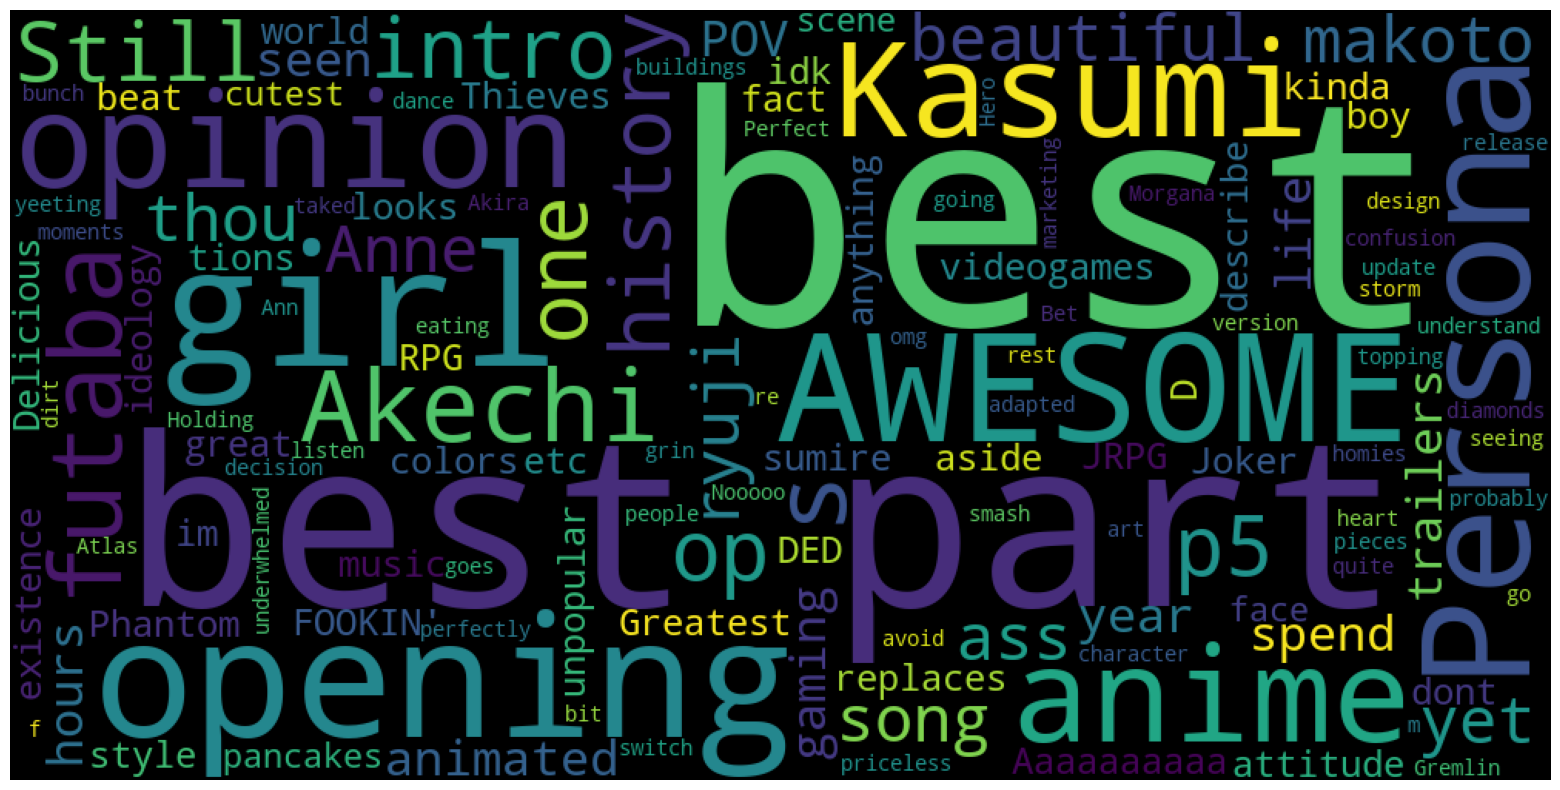

In [22]:
total_comments=(' '.join(comments_positive['comment']))
len(total_comments)
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(40,10))
plt.imshow(wordcloud)
plt.axis('off')

In [81]:
"""removes punctuation, stopwords, and returns a list of the remaining words, or tokens"""
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#nltk.download('stopwords')
#nltk.download('wordnet')

import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    4. Remove words
    '''
    stemmer = WordNetLemmatizer()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    nopunc =  [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
    return [stemmer.lemmatize(word) for word in nopunc]

#testing the function with a sample text#
sample_text = "Hey There! This is a Sample review, which 123happens {blah}%456 to contain happened punctuations universal rights of right contained."
print(text_process(sample_text))

['hey', 'there', 'this', 'sample', 'review', 'happens', 'blah', 'contain', 'happened', 'punctuation', 'universal', 'right', 'right', 'contained', 'whats', 'happening']


In [23]:
for i in df['comment']:
    print(i)
'''if(i=='I was listening to this song when I was getting robbed 😢😢'):
        break'''

i miss persona so much
Mid
🚬
When persona 5 i love it favorite of multiverse anime u.a.c gotta phantom thieves
スマブラspなら、リンク、ジョーカー、クラウド使ってたわw
*cries in 1:18 *
Ananas
Weak. Another reason why p4 is goat
Why do I love this game after one 8 hour play session of pain and suffering?
Loving the song tho
If they ever do a live action of Persona 5, I would love to play Ren/Joker. I feel connected to him and we both look similar. Looks aside, as an aspiring actor, i believe i could embody an essence of the character when it comes to being there for other people, always caring for my friends more so than myself.
POV: You are about to spend the best 100+ hours of your gaming life this year
My all-time favorite videogame that introduced me to my favorite franchise 🎭
🩵💛❤️
❤❤❤🎧🎤🇲🇽
Fox is my faovurite character, this Game is a Art
i miss it sm
whats with improved persona versions having worse openings than their original releases? lmao
I'm not afraid to say that the Persona series is the most impactfu

"if(i=='I was listening to this song when I was getting robbed 😢😢'):\n        break"

In [31]:
# Import the stopwords collection and the word_tokenize function
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Define the node class for the binary search tree
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

# Define the binary search tree class
class BST:
    def __init__(self):
        self.root = None

    # Insert a new word into the tree
    def insert(self, word):
        # If the tree is empty, make the word the root node
        if self.root is None:
            self.root = Node(word)
        else:
            # Start from the root node
            current = self.root
            # Loop until the word is inserted
            while True:
                # If the word is smaller than the current node's data, go to the left subtree
                if word < current.data:
                    # If the left child is empty, make the word the left child
                    if current.left is None:
                        current.left = Node(word)
                        break
                    # Otherwise, go to the left child
                    else:
                        current = current.left
                # If the word is larger than the current node's data, go to the right subtree
                elif word > current.data:
                    # If the right child is empty, make the word the right child
                    if current.right is None:
                        current.right = Node(word)
                        break
                    # Otherwise, go to the right child
                    else:
                        current = current.right
                # If the word is equal to the current node's data, do nothing
                else:
                    break

    # Display the tree in a level-order traversal
    def display(self):
        # If the tree is empty, print nothing
        if self.root is None:
            return
        else:
            # Create a queue to store the nodes at each level
            queue = []
            # Enqueue the root node
            queue.append(self.root)
            # Loop until the queue is empty
            while queue:
                # Get the number of nodes at the current level
                level_size = len(queue)
                # Loop for each node at the current level
                for _ in range(level_size):
                    # Dequeue the first node in the queue
                    node = queue.pop(0)
                    # Print the node's data
                    print(node.data, end=" ")
                    # Enqueue the left child if it exists
                    if node.left:
                        queue.append(node.left)
                    # Enqueue the right child if it exists
                    if node.right:
                        queue.append(node.right)
                # Print a newline after each level
                print()

    # Return a list of all the words in the tree in an in-order traversal
    def to_list(self):
        # Create an empty list to store the words
        words = []
        # Define a helper function to recursively traverse the tree
        def traverse(node):
            # If the node is not empty, visit the left subtree, the node, and the right subtree
            if node:
                traverse(node.left)
                words.append(node.data)
                traverse(node.right)
        # Call the helper function starting from the root node
        traverse(self.root)
        # Return the list of words
        return words

cleaned_comment_list=[]

# Define the string to process
for string in df['comment']:
    # Create an instance of the binary search tree i.e., new tree object for each comment
    tree = BST()
    
# Check if the value is a string or a bytes-like object
    if isinstance(string, (str, bytes)):
    
    # tree.display()
    # Tokenize the string into a list of words
        words = word_tokenize(string)
    
    # Get the stopwords list for English
        stop_words = stopwords.words("english")
    
    # Iterate over the words and insert them into the tree if they are not stopwords
        for word in words:
        # Convert the word to lowercase
            word = word.lower()
        # Check if the word is not a stopword and not a punctuation
            if word not in stop_words and word.isalpha():
            # Insert the word into the tree
                tree.insert(word)
            '''elif re.match(r'[\U0001F300-\U0001F64F]', word):
                # Insert the emoji into the tree
                tree.insert(word)
            '''

    # Display the tree
   # tree.display()

    # Get the list of words from the tree
    #words_list = ' '.join(tree.to_list())
    #words_list = ' '.join([x for x in tree.to_list() if x])
        words_list = ' '.join(filter(None, tree.to_list()))
        #print(words_list)
        cleaned_comment_list.append(words_list)

print(cleaned_comment_list)

['miss much persona', 'mid', '', 'anime favorite got love multiverse persona phantom ta thieves', '', 'cries', 'ananas', 'another goat reason weak', 'game hour love loving one pain play session song suffering tho', 'action actor always aside aspiring believe caring character comes connected could embody essence ever feel friends live look looks love people persona play similar would', 'best gaming hours life pov spend year', 'favorite franchise introduced videogame 🎭', '', 'art character faovurite fox game', 'miss sm', 'improved lmao openings original persona releases versions whats worse', 'afraid impactful life persona play played say series yet', 'hitting kasumi', 'breakdancing kasumi really started went', 'diamond imagine painfull part would', 'ease exited hand nah persona real', 'beloved destroy hero japan personazilla theaters watch', '', 'amazing chills game give intro life rest', 'ouch', 'end exit friends pov school walking', 'animated best ever one seen trailers', 'called song

In [93]:
# Import the stopwords collection and the word_tokenize function
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from cleantext import clean # to remove emojis
import re

# Define the node class for the binary search tree
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

# Define the binary search tree class
class BST:
    def __init__(self):
        self.root = None

    # Insert a new word into the tree
    def insert(self, word):
        # If the tree is empty, make the word the root node
        if self.root is None:
            self.root = Node(word)
        else:
            # Start from the root node
            current = self.root
            # Loop until the word is inserted
            while True:
                # If the word is smaller than the current node's data, go to the left subtree
                if word < current.data:
                    # If the left child is empty, make the word the left child
                    if current.left is None:
                        current.left = Node(word)
                        break
                    # Otherwise, go to the left child
                    else:
                        current = current.left
                # If the word is larger than the current node's data, go to the right subtree
                elif word > current.data:
                    # If the right child is empty, make the word the right child
                    if current.right is None:
                        current.right = Node(word)
                        break
                    # Otherwise, go to the right child
                    else:
                        current = current.right
                # If the word is equal to the current node's data, do nothing
                else:
                    break

    # Display the tree in a level-order traversal
    def display(self):
        # If the tree is empty, print nothing
        if self.root is None:
            return
        else:
            # Create a queue to store the nodes at each level
            queue = []
            # Enqueue the root node
            queue.append(self.root)
            # Loop until the queue is empty
            while queue:
                # Get the number of nodes at the current level
                level_size = len(queue)
                # Loop for each node at the current level
                for _ in range(level_size):
                    # Dequeue the first node in the queue
                    node = queue.pop(0)
                    # Print the node's data
                    print(node.data, end=" ")
                    # Enqueue the left child if it exists
                    if node.left:
                        queue.append(node.left)
                    # Enqueue the right child if it exists
                    if node.right:
                        queue.append(node.right)
                # Print a newline after each level
                print()

    # Return a list of all the words in the tree in an in-order traversal
    def to_list(self):
        # Create an empty list to store the words
        words = []
        # Define a helper function to recursively traverse the tree
        def traverse(node):
            # If the node is not empty, visit the left subtree, the node, and the right subtree
            if node:
                traverse(node.left)
                words.append(node.data)
                traverse(node.right)
        # Call the helper function starting from the root node
        traverse(self.root)
        # Return the list of words
        return words

cleaned_comment_list=[]

# Convert the list of stopwords to a set for faster membership checks
stopwords_set = set(stopwords.words("english"))

# Define the string to process
for string in df['comment']:
    # Create an instance of the binary search tree i.e., new tree object for each comment
    tree = BST()
    
    # Remove emojis from the string
    #string = clean(string, no_emoji=True)

    # Remove numbers from the string
    string = re.sub(r'\d+', '', string)
    
    # Tokenize the string into a list of words
    words = word_tokenize(string)

    # Create an instance of the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    # Loop through the words
    for word in words:
        # Lemmatize the word
        word = lemmatizer.lemmatize(word)
        # Check if the word is a stopword
        if word not in stopwords.words('english') and not re.match(r'[\U0001F300-\U0001F64F]', word):
            # Insert the word into the binary search tree
            tree.insert(word)
        
        '''# Lemmatize all words at once
        #lemmatized_words = [tree.lemmatizer.lemmatize(word.lower()) for word in words]
    lemmatized_words = [tree.lemmatizer.lemmatize(word.lower()) for word in words
                        if word not in stopwords_set and word.isalpha() and not re.match(r'[\U0001F300-\U0001F64F]', word)]


        # Filter out stopwords and non-alphabetic words
    #filtered_words = [word for word in lemmatized_words if word not in stop_words_set and word.isalpha()]

        # Insert filtered words into the tree
    for word in lemmatized_words:
        tree.insert(word)
    # Display the tree
   # tree.display()

    # Get the list of words from the tree
    words_list = ' '.join(filter(None, tree.to_list()))
        #print(words_list)
    cleaned_comment_list.append(words_list)'''
    # Append the list of words in the tree to the cleaned comment list
    cleaned_comment_list.append(' '.join(filter(None, tree.to_list())))

print(cleaned_comment_list)

['miss much persona', 'Mid', '🚬', 'When anime favorite got love multiverse persona phantom ta thief u.a.c', 'スマブラspなら、リンク、ジョーカー、クラウド使ってたわw', '* : cry', 'Ananas', '. Another Weak goat p reason', '? I Loving Why game hour love one pain play session song suffering tho', ', . I If Looks Persona Ren/Joker action actor always aside aspiring believe caring character come connected could embody essence ever feel friend live look love people play similar would', '+ : POV You best gaming hour life spend year', 'My all-time favorite franchise introduced videogame \U0001fa75💛❤️', '❤❤❤🎧🎤🇲🇽', ', Art Fox Game character faovurite', 'miss sm', '? improved lmao opening original persona release version whats worse', "'m 've . I Persona afraid impactful life play played say series yet", ': hitting kasumi ⬆️⬆️⬇️⬇️⬅️➡️⬅️➡️🅱️🅰️START', '. : KIRYU-CHAN Kasumi breakdancing really started went', 'Imagine diamond painfull part would', '. Nah Persona ease exited hand real ’', '! Japan Personazilla Watch beloved de

In [94]:
df.dropna(subset=['comment'], inplace=True)

# Reset the index of the dataframe
df.reset_index(drop=True, inplace=True)

df=df.assign(cleaned_comment=cleaned_comment_list)
df

,Unnamed: 0,comment,author_name,like_count,date,vidid,total_reply_counts,vid_title,just_date,polarity,cleaned_comment,vader_sentiment,vader_neg_sentiment,vader_pos_sentiment,vader_comp_sentiment
0,0,i miss persona so much,@mochii_,0,2024-01-19 14:53:36+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-19,0.20,miss much persona,"{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...",0.444,0.000,-1.0
1,1,Mid,@leonader9465,0,2024-01-19 00:41:36+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-19,0.00,Mid,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0
2,2,🚬,@eleduardo3581,0,2024-01-10 07:17:45+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-10,0.00,🚬,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0
3,3,When persona 5 i love it favorite of multivers...,@ultimateallstarclan6855,0,2024-01-05 06:47:58+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-05,0.50,When anime favorite got love multiverse person...,"{'neg': 0.2, 'neu': 0.364, 'pos': 0.436, 'comp...",0.200,0.436,1.0
4,4,スマブラspなら、リンク、ジョーカー、クラウド使ってたわw,@user-wc7sr5bh2e,1,2024-01-02 23:09:39+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-02,0.00,スマブラspなら、リンク、ジョーカー、クラウド使ってたわw,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,2409,My body is ready for this game \nEXCEPT \nFor ...,@nuzz_3936,2498,2019-09-10 21:29:25+00:00,vWWy7V9rCrA,47,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10,-0.10,EXCEPT For My body game ready wallet,"{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.000,0.385,1.0
2410,2410,Looking cool joker,@telly3436,403,2019-09-10 21:28:22+00:00,vWWy7V9rCrA,3,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10,0.35,Looking cool joker,"{'neg': 0.0, 'neu': 0.208, 'pos': 0.792, 'comp...",0.000,0.792,1.0
2411,2411,This is not Persona 6,@denzil2315,198,2019-09-10 21:26:29+00:00,vWWy7V9rCrA,11,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10,0.00,Persona This,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0
2412,2412,Cool looking,@hacktorb106,3,2019-09-10 21:26:21+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10,0.35,Cool looking,"{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'comp...",0.000,0.697,1.0


In [95]:
sentiment = SentimentIntensityAnalyzer()
sentiment.polarity_scores(df.cleaned_comment[8])
df['vader_sentiment'] = df.cleaned_comment.apply(lambda x: sentiment.polarity_scores(x))
df['vader_neg_sentiment'] = df.vader_sentiment.apply(lambda x: x['neg'])
df['vader_pos_sentiment'] = df.vader_sentiment.apply(lambda x: x['pos'])
df['vader_comp_sentiment'] = df.vader_sentiment.apply(lambda x: x['compound'])
df

,Unnamed: 0,comment,author_name,like_count,date,vidid,total_reply_counts,vid_title,just_date,polarity,cleaned_comment,vader_sentiment,vader_neg_sentiment,vader_pos_sentiment,vader_comp_sentiment
0,0,i miss persona so much,@mochii_,0,2024-01-19 14:53:36+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-19,0.20,miss much persona,"{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...",0.444,0.000,-0.1531
1,1,Mid,@leonader9465,0,2024-01-19 00:41:36+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-19,0.00,Mid,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0000
2,2,🚬,@eleduardo3581,0,2024-01-10 07:17:45+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-10,0.00,🚬,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0000
3,3,When persona 5 i love it favorite of multivers...,@ultimateallstarclan6855,0,2024-01-05 06:47:58+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-05,0.50,When anime favorite got love multiverse person...,"{'neg': 0.183, 'neu': 0.43, 'pos': 0.387, 'com...",0.183,0.387,0.5859
4,4,スマブラspなら、リンク、ジョーカー、クラウド使ってたわw,@user-wc7sr5bh2e,1,2024-01-02 23:09:39+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-02,0.00,スマブラspなら、リンク、ジョーカー、クラウド使ってたわw,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,2409,My body is ready for this game \nEXCEPT \nFor ...,@nuzz_3936,2498,2019-09-10 21:29:25+00:00,vWWy7V9rCrA,47,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10,-0.10,EXCEPT For My body game ready wallet,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...",0.000,0.294,0.3612
2410,2410,Looking cool joker,@telly3436,403,2019-09-10 21:28:22+00:00,vWWy7V9rCrA,3,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10,0.35,Looking cool joker,"{'neg': 0.0, 'neu': 0.208, 'pos': 0.792, 'comp...",0.000,0.792,0.4215
2411,2411,This is not Persona 6,@denzil2315,198,2019-09-10 21:26:29+00:00,vWWy7V9rCrA,11,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10,0.00,Persona This,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0000
2412,2412,Cool looking,@hacktorb106,3,2019-09-10 21:26:21+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10,0.35,Cool looking,"{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'comp...",0.000,0.697,0.3182


In [112]:
# most positive 
df.sort_values(by=['vader_comp_sentiment'], ascending=False)[['cleaned_comment']].head(10)

,cleaned_comment
1920,. As I another excuse get needed persona secon...
943,"'' , . By Kasumi Pick `` certain choosing colo..."
1812,", I They better distraction game hunter monste..."
950,* Top anime opening ten
949,"! 'm * , . ... But For Goes I If adult agree a..."
948,: Nice atlus spoiler
947,This better imo much opening original
946,'s 've : Ann They butt dedicated entire second...
945,"'s ( ) * , -- . > Akechi Also Atlus Both Even ..."
1814,", ? Joker chunk city friend model playing tell"


In [113]:
# most negative 
df.sort_values(by=['vader_comp_sentiment'], ascending=True)[['cleaned_comment']].head(10)

,cleaned_comment
0,miss much persona
1607,Time avoid half spoiler year
1606,already bad heard kotaku word writiing
499,Blue🎶 White🎶 color flying high🎶 lose🎶 ’
501,bad fan fiction jojo megami shin tensei x
1602,'s . Hopefully I bad game intro like much musi...
1601,", . But Dizzying I Kasumi animator attacker ba..."
1610,", . : HEAR IS KASUMI ME NEW OUT THE TRAITOR YA..."
1582,? Every I Why cry start time uncontrollably
1579,", - ... ; I PS n't play want"


In [114]:
'''import emoji
str=''
for i in df['comment']:
    list=[emoji.demojize(c) for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str+=emoji.emojize(ele)
str'''    #doent work :(

"import emoji\nstr=''\nfor i in df['comment']:\n    list=[emoji.demojize(c) for c in i if c in emoji.UNICODE_EMOJI]\n    for ele in list:\n        str+=emoji.emojize(ele)\nstr"

In [115]:
df["vader_comp_sentiment"] = df["vader_comp_sentiment"].apply(np.sign)
df

,Unnamed: 0,comment,author_name,like_count,date,vidid,total_reply_counts,vid_title,just_date,polarity,cleaned_comment,vader_sentiment,vader_neg_sentiment,vader_pos_sentiment,vader_comp_sentiment
0,0,i miss persona so much,@mochii_,0,2024-01-19 14:53:36+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-19,0.20,miss much persona,"{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...",0.444,0.000,-1.0
1,1,Mid,@leonader9465,0,2024-01-19 00:41:36+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-19,0.00,Mid,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0
2,2,🚬,@eleduardo3581,0,2024-01-10 07:17:45+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-10,0.00,🚬,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0
3,3,When persona 5 i love it favorite of multivers...,@ultimateallstarclan6855,0,2024-01-05 06:47:58+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-05,0.50,When anime favorite got love multiverse person...,"{'neg': 0.183, 'neu': 0.43, 'pos': 0.387, 'com...",0.183,0.387,1.0
4,4,スマブラspなら、リンク、ジョーカー、クラウド使ってたわw,@user-wc7sr5bh2e,1,2024-01-02 23:09:39+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2024-01-02,0.00,スマブラspなら、リンク、ジョーカー、クラウド使ってたわw,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,2409,My body is ready for this game \nEXCEPT \nFor ...,@nuzz_3936,2498,2019-09-10 21:29:25+00:00,vWWy7V9rCrA,47,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10,-0.10,EXCEPT For My body game ready wallet,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...",0.000,0.294,1.0
2410,2410,Looking cool joker,@telly3436,403,2019-09-10 21:28:22+00:00,vWWy7V9rCrA,3,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10,0.35,Looking cool joker,"{'neg': 0.0, 'neu': 0.208, 'pos': 0.792, 'comp...",0.000,0.792,1.0
2411,2411,This is not Persona 6,@denzil2315,198,2019-09-10 21:26:29+00:00,vWWy7V9rCrA,11,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10,0.00,Persona This,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0
2412,2412,Cool looking,@hacktorb106,3,2019-09-10 21:26:21+00:00,vWWy7V9rCrA,0,Persona 5 Royal - Official Opening Cinematic T...,2019-09-10,0.35,Cool looking,"{'neg': 0.0, 'neu': 0.303, 'pos': 0.697, 'comp...",0.000,0.697,1.0


In [116]:
import sklearn # machine learning
from sklearn.model_selection import train_test_split # splitting up data
import pandas as pd
import os
import csv
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

In [117]:
# Import the necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier # k-NN ensemble method
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm # support vector machine
from sklearn import metrics # for accuracy/ precision
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent

In [118]:
#df["com_stem_str"] = df["cleaned_comment"].apply(', '.join)

In [119]:
# Split the dataframe into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["cleaned_comment"], df["vader_comp_sentiment"], test_size=0.2, random_state=42)

# Vectorize the cleaned comments
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Evaluate the Naive Bayes classifier
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.5942028985507246
Precision: 0.6440352394255856
Recall: 0.49940697295536
F1-score: 0.49531571692893045


In [120]:
# Split the dataframe into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(df["cleaned_comment"], df["vader_comp_sentiment"], test_size=0.2, random_state=42)

print('lengths training variables: ', len(X_train),",", len(Y_train))
print('lengths testing variables: ', len(X_test),",", len(Y_test), '\n')

print('Are there any missing values?', 
      '\n * Training:', pd.isnull(X_train).values.any(), ',', pd.isnull(Y_train).values.any(), 
      '\n * Testing: ', pd.isnull(X_test).values.any(), ",", pd.isnull(Y_test).values.any())

lengths training variables:  1931 , 1931
lengths testing variables:  483 , 483 

Are there any missing values? 
 * Training: False , False 
 * Testing:  False , False


In [121]:
tfidf = TfidfVectorizer()
xtrain = tfidf.fit_transform(X_train) # transform and fit training data
xtest = tfidf.transform(X_test) # transform test data from fitted transformer

data_transformed = tfidf.fit_transform(df["cleaned_comment"]) # transform entire dataset for cross validation

In [122]:
mnb = MultinomialNB()
mnb.fit(xtrain, Y_train) # fit the model on the training data word counts and training data lables

MultinomialNB()

In [123]:
mnb_predict = mnb.predict(xtest) # make our y predictions (labels) on the comment test data
mnb_acc = metrics.accuracy_score(Y_test, mnb_predict)
print('We obtained ', round(mnb_acc, 6), '% accuracy for the model')

We obtained  0.546584 % accuracy for the model


In [124]:
print(metrics.classification_report(Y_test, mnb_predict))

metrics.confusion_matrix(Y_test, mnb_predict)

scores = cross_val_score(mnb, data_transformed, df["vader_comp_sentiment"], cv=5) # 5 fold cross validation
print("Confidence Interval for Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

              precision    recall  f1-score   support

        -1.0       1.00      0.06      0.12        93
         0.0       0.78      0.22      0.34       165
         1.0       0.52      0.99      0.68       225

    accuracy                           0.55       483
   macro avg       0.77      0.42      0.38       483
weighted avg       0.70      0.55      0.46       483

Confidence Interval for Accuracy: 0.57 (+/- 0.03)


In [125]:
knn = KNeighborsClassifier()
knn.fit(xtrain, Y_train)
knn_predict = knn.predict(xtest)

In [126]:
knn_acc = metrics.accuracy_score(Y_test, knn_predict)
print('We obtained ', round(knn_acc, 6), '% accuracy for the KNN Bagging model')


scores = cross_val_score(knn, data_transformed, df['vader_comp_sentiment'], cv=5) # 5 fold cross validation
print("Confidence Interval for Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

We obtained  0.412008 % accuracy for the KNN Bagging model
Confidence Interval for Accuracy: 0.36 (+/- 0.01)
